In [1]:
%matplotlib inline

# Data analysis with pynapple
This notebook has had all its explanatory text removed and has not been run.
 It is intended to be downloaded and run locally (or on the provided binder)
 while listening to the presenter's explanation. In order to see the fully
 rendered of this notebook, go [here](../../full/day1/head_direction.md)
## Learning objectives


- Loading a NWB file
- Compute tuning curves
- Decode neural activity
- Compute correlograms
- Compute perievent


The pynapple documentation can be found [here](https://pynapple.org).

The API documentation is [here](https://pynapple.org/api.html).


Let's start by importing the pynapple package, matplotlib, numpy to see if everything is correctly installed. 
If an import fails, you can do `!pip install pynapple matplotlib` in a cell to fix it.

In [2]:
import pynapple as nap
import matplotlib.pyplot as plt
import workshop_utils
import numpy as np

/Users/jorge/Princeton Dropbox/Jorge Yanar/research/workshops/ccn-software-jan-2025/.venv/lib/python3.11/site-packages/nemos/_documentation_utils/plotting.py:38: UserWarning: plotting functions contained within `_documentation_utils` are intended for nemos's documentation. Feel free to use them, but they will probably not work as intended with other datasets / in other contexts.
  warnings.warn(


## Loading a NWB file


Pynapple commit to support NWB for data loading. 
If you have installed the repository, you can run the following cell:

In [3]:
path = workshop_utils.fetch_data("Mouse32-140822.nwb")

print(path)

/Users/jorge/Princeton Dropbox/Jorge Yanar/research/workshops/ccn-software-jan-2025/data/Mouse32-140822.nwb


Pynapple provides the convenience function `nap.load_file` for loading a NWB file.

**Question:** Can you open the NWB file giving the variable `path` to the function `load_file` and call the output `data`?

In [5]:
data = nap.load_file(path)

The content of the NWB file is not loaded yet. The object `data` behaves like a dictionnary.

**Question:** Can you load the spike times from the NWB and call the variables `spikes`?

In [12]:
print(data)

Mouse32-140822
┍━━━━━━━━━━━━━━━━━━━━━━━┯━━━━━━━━━━━━━┑
│ Keys                  │ Type        │
┝━━━━━━━━━━━━━━━━━━━━━━━┿━━━━━━━━━━━━━┥
│ units                 │ TsGroup     │
│ sws                   │ IntervalSet │
│ rem                   │ IntervalSet │
│ position_time_support │ IntervalSet │
│ epochs                │ IntervalSet │
│ ry                    │ Tsd         │
┕━━━━━━━━━━━━━━━━━━━━━━━┷━━━━━━━━━━━━━┙


In [16]:
spikes = data['units']

**Question:** And print it?

In [17]:
print(spikes)

Index    rate     location    group
-------  -------  ----------  -------
0        2.96981  thalamus    1
1        2.42638  thalamus    1
2        5.93417  thalamus    1
3        5.04432  thalamus    1
4        0.30207  adn         2
5        0.87042  adn         2
6        0.36154  adn         2
...      ...      ...         ...
42       1.02061  thalamus    5
43       6.84913  thalamus    6
44       0.94002  thalamus    6
45       0.55768  thalamus    6
46       1.15056  thalamus    6
47       0.46084  thalamus    6
48       0.19287  thalamus    7


There are a lot of neurons. The neurons that interest us are the neurons labeled `adn`. 

**Question:** Using the [slicing method](https://pynapple.org/user_guide/03_metadata.html#using-metadata-to-slice-objects) of your choice, can you select only the neurons in `adn` that are above 1 Hz firing rate?

In [22]:
spikes = spikes[spikes.location == 'adn']
spikes = spikes[spikes.rate > 1]

The NWB file contains other informations about the recording. `ry` contains the value of the head-direction of the animal over time. 

**Question:** Can you extract the angle of the animal in a variable called `angle` and print it?

In [25]:
angle = data['ry']

But are the data actually loaded ... or not?

**Question:** Can you print the underlying data array of `angle`?

In [26]:
angle

Time (s)
----------  --------
8812.416    0.581795
8812.4416   0.578113
8812.4672   0.571791
8812.4928   0.554532
8812.5184   0.554532
8812.544    0.554532
8812.5696   0.554532
...
10771.123   5.67668
10771.149   5.67668
10771.174   5.7182
10771.2     5.74727
10771.226   5.74727
10771.251   5.74727
10771.277   5.72318
dtype: float64, shape: (71478,)

The animal was recorded during wakefulness and sleep. 

**Question:** Can you extract the behavioral intervals in a variable called `epochs`?

In [27]:
data

Mouse32-140822
┍━━━━━━━━━━━━━━━━━━━━━━━┯━━━━━━━━━━━━━┑
│ Keys                  │ Type        │
┝━━━━━━━━━━━━━━━━━━━━━━━┿━━━━━━━━━━━━━┥
│ units                 │ TsGroup     │
│ sws                   │ IntervalSet │
│ rem                   │ IntervalSet │
│ position_time_support │ IntervalSet │
│ epochs                │ IntervalSet │
│ ry                    │ Tsd         │
┕━━━━━━━━━━━━━━━━━━━━━━━┷━━━━━━━━━━━━━┙

In [28]:
epochs = data['epochs']

/Users/jorge/Princeton Dropbox/Jorge Yanar/research/workshops/ccn-software-jan-2025/.venv/lib/python3.11/site-packages/pynapple/io/interface_nwb.py:90: UserWarning: DataFrame is not sorted by start times. Sorting it.
  data = nap.IntervalSet(df)


In [29]:
epochs

  index    start      end  tags
      0      0     8812.3  ['sleep']
      1   8812.3  10771.3  ['wake']
      2  10771.3  22025    ['sleep']
shape: (3, 2), time unit: sec.

In [35]:
type(spikes)

pynapple.core.ts_group.TsGroup

NWB file can save intervals with multiple labels. The object `IntervalSet` includes the labels as a metadata object.

**Question:** Using the column `tags`, can you create one `IntervalSet` object for intervals labeled `wake` and one `IntervalSet` object for intervals labeled `sleep`?

In [33]:
ep_wake = epochs[epochs.tags == 'wake']
ep_sleep = epochs[epochs.tags == 'sleep']
print(ep_sleep)

  index    start      end  tags
      0      0     8812.3  ['sleep']
      1  10771.3  22025    ['sleep']
shape: (2, 2), time unit: sec.


## Compute tuning curves


Now that we have spikes and a behavioral feature (i.e. head-direction), we would like to compute the firing rate of neurons as a function of the variable `angle` during `wake_ep`.
To do this in pynapple, all you need is a single line of code!

**Question:** can you compute the firing rate of ADn units as a function of heading direction, i.e. a head-direction tuning curve and call the variable `tuning_curves`?

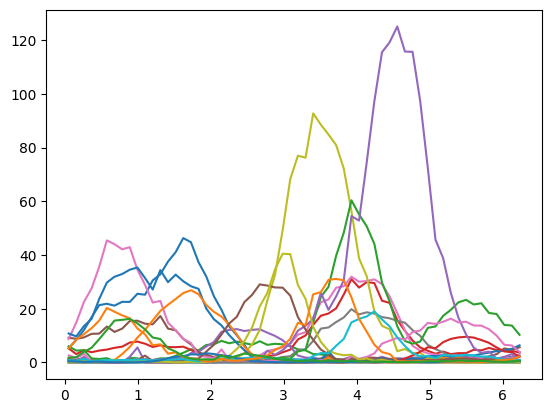

In [58]:
tuning_curves = nap.compute_1d_tuning_curves(spikes, angle, 60, ep=ep_wake)

plt.figure() ; plt.plot(tuning_curves);

**Question:** Can you plot some tuning curves?

In [51]:
# enter code here

Most of those neurons are head-directions neurons.

The next cell allows us to get a quick estimate of the neurons's preferred direction.

In [52]:
pref_ang = tuning_curves.idxmax()

**Question:** Can you add it to the metainformation of `spikes`?

In [53]:
spikes

Index    rate      location    group
-------  --------  ----------  -------
7        10.51737  adn         2
8        2.62475   adn         2
9        2.55818   adn         2
10       7.06715   adn         2
12       1.58248   adn         2
13       4.87837   adn         2
14       8.47337   adn         2
...      ...       ...         ...
26       4.0242    adn         3
28       1.78011   adn         4
29       4.23006   adn         4
30       2.15215   adn         4
32       1.12899   adn         4
33       5.26316   adn         4
34       1.57122   adn         4

In [54]:
spikes.pref_ang = pref_ang

In [55]:
spikes

Index    rate      location    group    pref_ang
-------  --------  ----------  -------  ------------------
7        10.51737  adn         2        1.57072533371475
8        2.62475   adn         2        5.34038154674295
9        2.55818   adn         2        2.1990013692194506
10       7.06715   adn         2        4.08382947573355
12       1.58248   adn         2        2.617852059555917
13       4.87837   adn         2        0.9424492982100501
14       8.47337   adn         2        0.7330239530418168
...      ...       ...         ...      ...
26       4.0242    adn         3        5.34038154674295
28       1.78011   adn         4        5.96865758224765
29       4.23006   adn         4        3.0367027498923838
30       2.15215   adn         4        4.293254820901783
32       1.12899   adn         4        1.9895760240512168
33       5.26316   adn         4        3.664978785397084
34       1.57122   adn         4        0.7330239530418168

This index maps a neuron to a preferred direction between 0 and 360 degrees.

**Question:** Can you plot the spiking activity of the neurons based on their preferred direction as well as the head-direction of the animal?
For the sake of visibility, you should restrict the data to the following epoch : `ex_ep = nap.IntervalSet(start=8910, end=8960)`.

In [59]:
ex_ep = nap.IntervalSet(start=8910, end=8960)

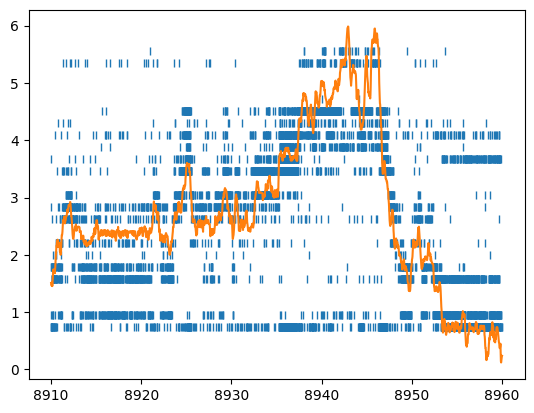

In [64]:
fig, ax = plt.subplots(1,1)
ax.plot(spikes.restrict(ex_ep).to_tsd('pref_ang'), '|')
ax.plot(angle.restrict(ex_ep))



In [65]:
spikes.restrict(ex_ep).to_tsd('pref_ang')

Time (s)
----------  --------
8910.00745  2.82728
8910.0149   0.733024
8910.01895  0.733024
8910.0229   3.66498
8910.02765  0.942449
8910.02905  1.78015
8910.03735  1.78015
...
8959.84075  0.942449
8959.8601   0.733024
8959.8638   0.942449
8959.8948   3.66498
8959.89935  0.733024
8959.94225  0.733024
8959.95055  0.733024
dtype: float64, shape: (6845,)

## Decode neural activity


Population activity clearly codes for head-direction. Can we use the spiking activity of the neurons to infer the current heading of the animal? The process is called bayesian decoding.

**Question:** Using the right pynapple function, can you compute the decoded angle from the spiking activity during wakefulness?

In [68]:
anglehat, angledistr = nap.decoding.decode_1d(tuning_curves, spikes, ep=ep_wake, bin_size=0.5)

/Users/jorge/Princeton Dropbox/Jorge Yanar/research/workshops/ccn-software-jan-2025/.venv/lib/python3.11/site-packages/numpy/_core/fromnumeric.py:86: RuntimeWarning: overflow encountered in reduce
  return ufunc.reduce(obj, axis, dtype, out, **passkwargs)
/Users/jorge/Princeton Dropbox/Jorge Yanar/research/workshops/ccn-software-jan-2025/.venv/lib/python3.11/site-packages/pynapple/process/decoding.py:111: RuntimeWarning: invalid value encountered in divide
  p = p / p.sum(1)[:, np.newaxis]


**Question:** ... and display the decoded angle next to the true angle?

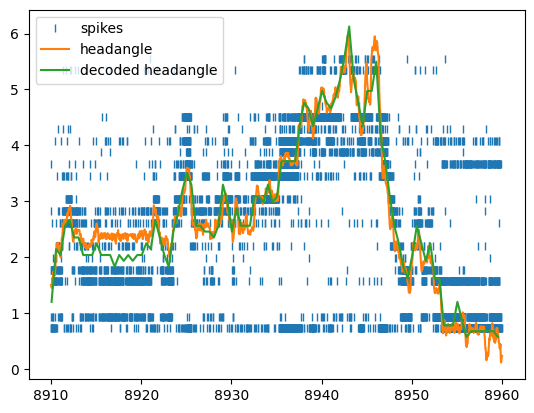

In [74]:
fig, ax = plt.subplots(1,1)
ax.plot(spikes.restrict(ex_ep).to_tsd('pref_ang'), '|', label='spikes')
ax.plot(angle.restrict(ex_ep), label='headangle')
ax.plot(anglehat.restrict(ex_ep), label='decoded headangle')
ax.legend()

Since the tuning curves were computed during wakefulness, it is a circular action to decode spiking activity during wakefulness.
We can try something more interesting by trying to decode the angle during sleep. 

**Question:** Can you instantiate an `IntervalSet` object called `rem_ep` that contains the epochs of REM sleep? You can check the contents of the NWB file by doing first `print(data)`

In [76]:
data['rem']

index    start    end     tags
0        60.0     88.0    ['0']
1        2535.0   2566.0  ['1']
2        2774.0   2876.0  ['2']
3        3191.0   3340.0  ['3']
4        4424.0   4479.0  ['4']
5        4722.0   4796.0  ['5']
6        5115.0   5167.0  ['6']
...      ...      ...     ...
22       60.0     88.0    ['22']
23       2535.0   2566.0  ['23']
24       2774.0   2876.0  ['24']
25       3191.0   3340.0  ['25']
26       4424.0   4479.0  ['26']
27       4722.0   4796.0  ['27']
28       5115.0   5167.0  ['28']
shape: (29, 2), time unit: sec.

**Question:** Can you compute the decoded angle from the spiking activity during REM sleep?

In [ ]:
# enter code here

**Question:** ... and display the decoded angle next to the spiking activity?

In [ ]:
# enter code here

## Compute correlograms


We see that some neurons have a correlated activity. Can we measure it?

**Question:** Can you compute cross-correlograms during wake for all pairs of neurons and call it `cc_wake`?

In [91]:
cc_wake = nap.compute_crosscorrelogram(spikes, binsize=0.1, windowsize=20, ep=ep_wake)

**Question:** can you plot the cross-correlogram during wake of 2 neurons firing for the same direction?

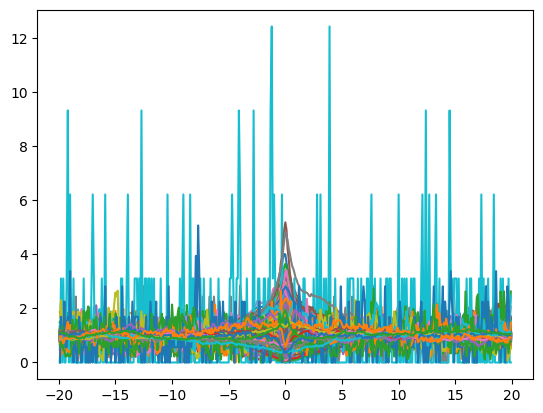

In [92]:
plt.plot(cc_wake);

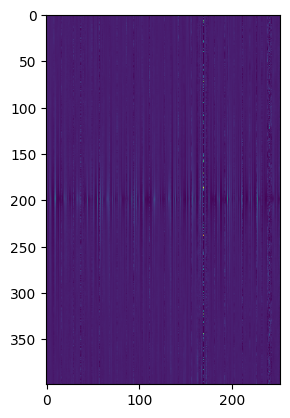

In [93]:
plt.imshow(cc_wake)

In [96]:
cc_wake

7                                                               \
             8         9         10        12        13        14        17   
-19.9  0.892736  1.089845  1.077238  0.990057  0.980282  1.131893  1.052389   
-19.8  0.897204  1.080565  1.065753  0.989613  0.973719  1.135021  1.067874   
-19.7  0.910608  1.078171  1.081373  0.995159  0.995428  1.135721  1.066673   
-19.6  0.873969  1.105409  1.068739  0.985842  0.982975  1.136561  1.076156   
-19.5  0.901672  1.117083  1.070959  1.026216  0.970185  1.115368  1.071355   
...         ...       ...       ...       ...       ...       ...       ...   
 19.5  1.050908  0.872534  0.952738  0.954119  1.060724  1.029758  0.909541   
 19.6  1.118824  0.836914  0.972569  0.951679  1.045410  1.029477  0.907981   
 19.7  1.058057  0.818656  0.986658  0.998265  1.058873  1.056738  0.945673   
 19.8  1.091121  0.828234  0.980073  0.964102  1.052646  1.048429  0.914943   
 19.9  1.066100  0.778546  0.978082  0.980518  1.043559  1.038487  0.918904   

                                     ...        29                      \
             18        19        20  ...        30        32        33   
-19.9  1.190318  1.346744  1.031614  ...  1.089399  0.951762  1.142191   
-19.8  1.179199  1.319399  1.031689  ...  1.068130  0.993679  1.148261   
-19.7  1.161585  1.114311  1.030867  ...  1.081829  0.949296  1.148434   
-19.6  1.160071  1.257873  1.021307  ...  1.082910  0.971487  1.122594   
-19.5  1.143572  1.462961  1.029000  ...  1.051548  1.010939  1.078543   
...         ...       ...       ...  ...       ...       ...       ...   
 19.5  0.851980  0.710971  1.034752  ...  0.896177  1.013404  0.872338   
 19.6  0.866287  0.799843  1.047599  ...  0.890048  1.023267  0.880316   
 19.7  0.854132  0.861369  1.037739  ...  0.897619  0.917242  0.893670   
 19.8  0.841260  0.745153  1.030718  ...  0.877792  0.882722  0.907891   
 19.9  0.832493  0.622100  1.010849  ...  0.892211  1.006007  0.893323   

                       30                            32                  33  
             34        32        33        34        33        34        34  
-19.9  0.847899  1.065991  0.888287  0.923829  1.042439  0.958369  1.103975  
-19.8  0.842470  1.045659  0.889512  0.931968  1.060605  0.970299  1.107891  
-19.7  0.856783  1.060182  0.895437  0.915108  1.091347  0.854977  1.078242  
-19.6  0.868134  1.112465  0.875007  0.895922  1.117897  0.707841  1.085235  
-19.5  0.878005  1.092133  0.882158  0.885457  0.997723  0.803281  1.095024  
...         ...       ...       ...       ...       ...       ...       ...  
 19.5  0.873069  0.946902  0.997382  1.053479  1.045234  0.835094  1.055027  
 19.6  0.884914  0.967234  1.014134  1.103478  0.979558  0.727725  1.029295  
 19.7  0.889850  0.900428  1.011887  1.101153  1.056413  0.910650  1.045797  
 19.8  0.925878  0.845241  1.011070  1.151152  0.978160  0.942463  1.043839  
 19.9  0.968816  0.842336  1.003102  1.112780  0.971173  0.922580  1.071809  

[399 rows x 253 columns]

**Question:** can you plot the cross-correlogram during wake of 2 neurons firing for opposite directions?

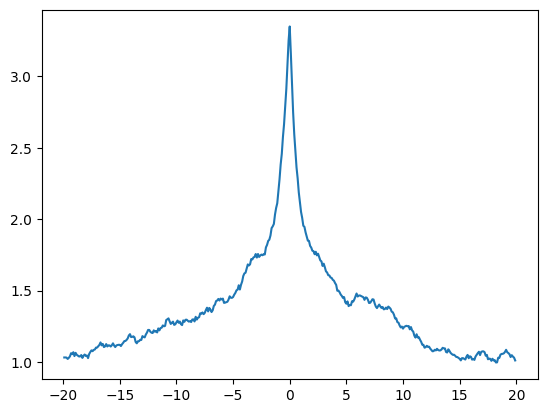

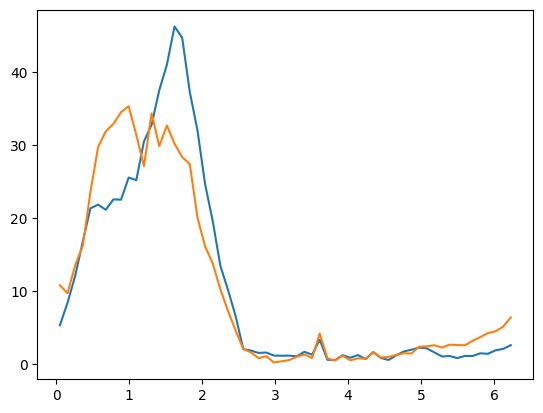

In [98]:
plt.plot(cc_wake[(7,20)]) # same direction
plt.figure()
plt.plot(tuning_curves[[7,20]])

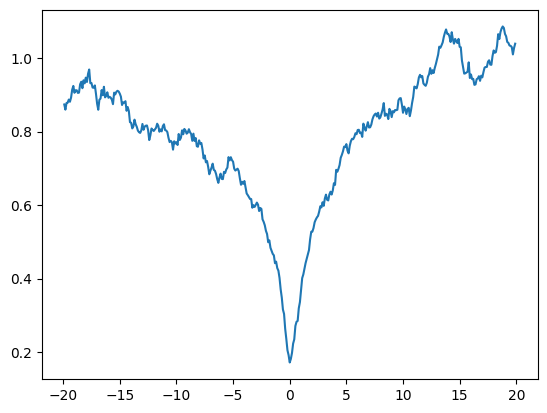

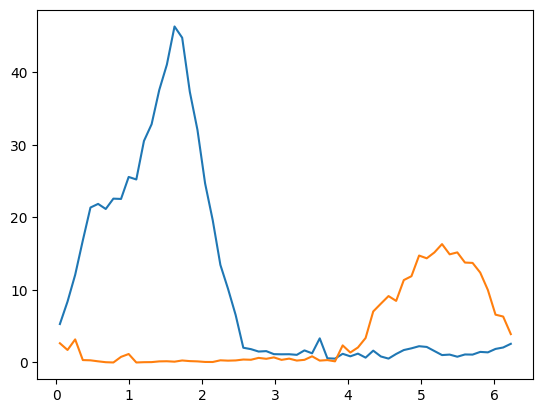

In [100]:
plt.figure()
plt.plot(cc_wake[7,26])
plt.figure()
plt.plot(tuning_curves[[7,26]])

Pairwise correlation were computed during wakefulness. The activity of the neurons was also recorded during sleep.

**Question:** can you compute the cross-correlograms during sleep?

In [103]:
cc_sleep = nap.compute_crosscorrelogram(spikes, binsize=0.02, windowsize=1.0, ep=ep_sleep)

**Question:** can you display the cross-correlogram for wakefulness and sleep of the same pairs of neurons?

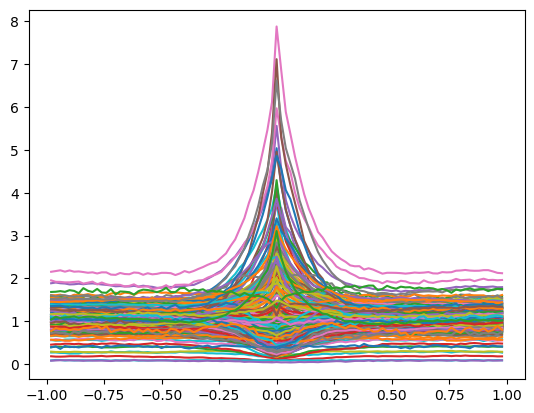

In [107]:
plt.figure()
plt.plot(cc_sleep);

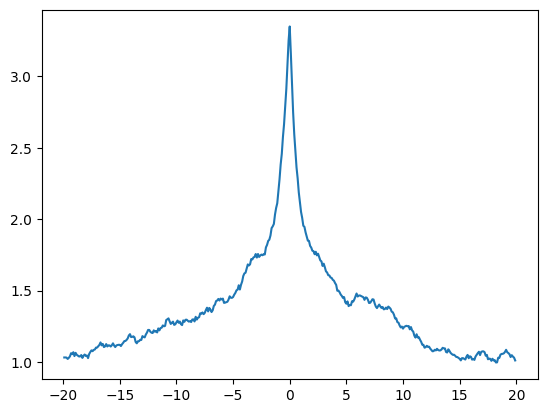

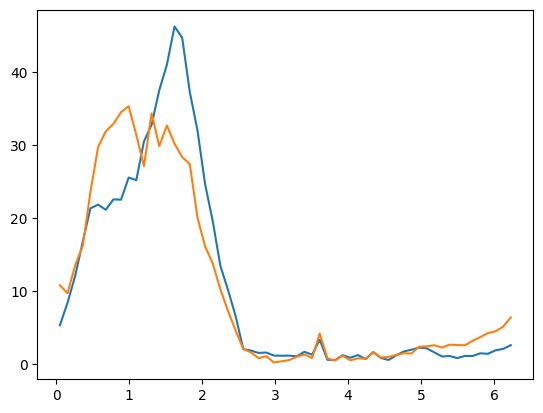

In [105]:
plt.plot(cc_wake[(7,20)]) # same direction
plt.figure()
plt.plot(tuning_curves[[7,20]])

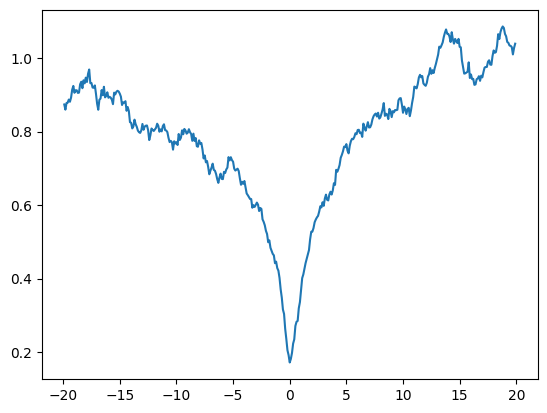

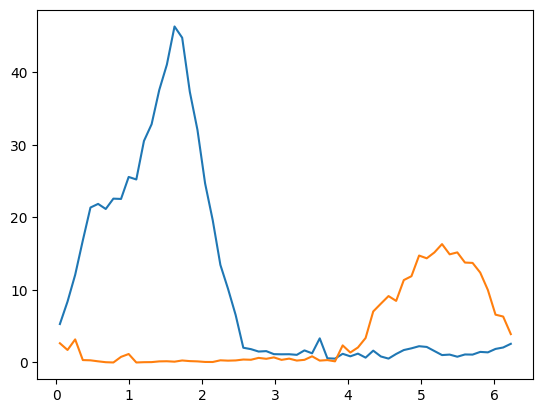

In [106]:
plt.figure()
plt.plot(cc_wake[7,26])
plt.figure()
plt.plot(tuning_curves[[7,26]])

## Compute perievent


Sometimes, some events occurs during recording such as rewards. There was no particular events during this recording but we can look for when the head-direction is close to a particular direction as an event.

In [ ]:
plt.figure()
plt.plot(tuning_curves[9])
plt.axvline(1.5)

crossing_times = np.cos(angle).threshold(np.cos(1.5), "below").time_support.start
crossing_times = nap.Ts(t=crossing_times)

**Question:** Can you compute a perievent time histogram around the timestamps defined in `crossing_times` for neuron 9?

In [ ]:
# enter code here

**Question:** ...and plot the spikes?

In [ ]:
# enter code here

**Question:** Can you compute the mean firing rate of the PETH around `crossing_times` in bins of 100 ms?

In [ ]:
# enter code here

**Question:** ... and plot it?

In [ ]:
# enter code here

Is this a strong effect? We would like to compare this to surrogate dataset.

**Question:** Shuffling the spike trains, can you generate a mean random PETH to compare to the true mean PETH?

In [ ]:
# enter code here